Simple demand response system using machine learning to predict electricity load and respond accordingly. This example uses the Electricity Load Diagrams Dataset from the UCI Machine Learning Repository.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Renewable_Energy/Demand_Response_SmartGrids

/content/drive/MyDrive/Renewable_Energy/Demand_Response_SmartGrids


# Demand Response in Smart Grids

Objective:

Develop a demand response system that automatically adjusts the load based on grid conditions.

-----------------------------------------------------------

Dataset:

The Electricity Load Diagrams Dataset, available from the UCI Machine Learning Repository.

-----------------------------------------------------------

Python Libraries:

pandas - Pandas

numpy - NumPy

matplotlib.pyplot - Matplotlib

sklearn.model_selection and sklearn.preprocessing - Scikit-learn

sklearn.linear_model.LinearRegression - Scikit-learn

sklearn.metrics - Scikit-learn

zipfile - (No additional library required, part of Python's standard library)

seaborn - Seaborn

statsmodels.tsa.arima.model.ARIMA - Statsmodels

prophet - Prophet

-----------------------------------------------------------

Description:

This project focuses on implementing a demand response strategy by predicting periods of high load and adjusting the grid's supply in real-time.

In [ ]:
!pip install prophet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

In [ ]:
# import requests
# import io

# # URL of the dataset
# url = "https://archive.ics.uci.edu/static/public/321/electricityloaddiagrams20112014.zip"

# # Download the dataset
# response = requests.get(url)
# zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# # Extract the dataset
# zip_file.extractall("electricity_load")

# LinearRegression model

In [ ]:
# Path to your dataset file
file_path = "electricity_load/LD2011_2014.txt"

# Read the dataset into a DataFrame
df = pd.read_csv(file_path, sep=';', quotechar='"')

# Display the first few rows of the DataFrame
print(df.head())

<ipython-input-4-47f66e085b8c>:5: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';', quotechar='"')


              Datetime MT_001 MT_002 MT_003 MT_004 MT_005 MT_006 MT_007  \
0  2011-01-01 00:15:00      0      0      0      0      0      0      0   
1  2011-01-01 00:30:00      0      0      0      0      0      0      0   
2  2011-01-01 00:45:00      0      0      0      0      0      0      0   
3  2011-01-01 01:00:00      0      0      0      0      0      0      0   
4  2011-01-01 01:15:00      0      0      0      0      0      0      0   

  MT_008 MT_009  ... MT_361 MT_362 MT_363 MT_364 MT_365 MT_366 MT_367 MT_368  \
0      0      0  ...      0    0.0      0      0      0      0      0      0   
1      0      0  ...      0    0.0      0      0      0      0      0      0   
2      0      0  ...      0    0.0      0      0      0      0      0      0   
3      0      0  ...      0    0.0      0      0      0      0      0      0   
4      0      0  ...      0    0.0      0      0      0      0      0      0   

  MT_369 MT_370  
0      0      0  
1      0      0  
2      0      

In [ ]:
# Read the dataset with datetime parsing (if applicable)
df = pd.read_csv(file_path, sep=';', quotechar='"', parse_dates=['Datetime'], index_col='Datetime')

# Display the first few rows
print(df.head())

<ipython-input-6-adf279264976>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep=';', quotechar='"', parse_dates=['Datetime'], index_col='Datetime')


                    MT_001 MT_002 MT_003 MT_004 MT_005 MT_006 MT_007 MT_008  \
Datetime                                                                      
2011-01-01 00:15:00      0      0      0      0      0      0      0      0   
2011-01-01 00:30:00      0      0      0      0      0      0      0      0   
2011-01-01 00:45:00      0      0      0      0      0      0      0      0   
2011-01-01 01:00:00      0      0      0      0      0      0      0      0   
2011-01-01 01:15:00      0      0      0      0      0      0      0      0   

                    MT_009 MT_010  ... MT_361 MT_362 MT_363 MT_364 MT_365  \
Datetime                           ...                                      
2011-01-01 00:15:00      0      0  ...      0    0.0      0      0      0   
2011-01-01 00:30:00      0      0  ...      0    0.0      0      0      0   
2011-01-01 00:45:00      0      0  ...      0    0.0      0      0      0   
2011-01-01 01:00:00      0      0  ...      0    0.0      0  

Preprocess the Data:

We will focus on preprocessing the data by handling missing values, resampling the data, and creating features.

In [ ]:
# Handle missing values
# Iterate over the DataFrame's columns
for col in df.columns:
    if col != 'Datetime':  # Exclude the 'datetime' column
        try:
            # Try converting the column to float, replace non-convertible with NaN
            df[col] = pd.to_numeric(df[col], errors='coerce')
            # Forward fill to replace NaNs with previous valid values
            df[col] = df[col].fillna(method='ffill')
        except Exception as e:
            print(f"Error processing column {col}: {e}")

print(df)

<ipython-input-7-d5377eaa4cee>:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method='ffill')


                     MT_001  MT_002  MT_003  MT_004  MT_005  MT_006  MT_007  \
Datetime                                                                      
2011-01-01 00:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:30:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 00:45:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2011-01-01 01:15:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
2014-12-31 23:00:00     0.0     0.0     0.0   250.0    50.0   375.0     0.0   
2014-12-31 23:15:00     0.0     0.0     0.0   250.0    50.0   375.0     0.0   
2014-12-31 23:30:00     0.0     0.0     0.0   250.0    50.0   375.0     0.0   
2014-12-31 23:45:00     0.0     0.0     0.0   250.0    50.0   375.0     0.0   
2015-01-01 00:00:00     0.0     0.0     0.0   250.0 

In [ ]:
# Handle missing values
# df = df.fillna(df.mean())

# Resample the data to daily electricity consumption
df_daily = df.resample('D').sum()

# Create features: day of the week, month, and lag features
df_daily['DayOfWeek'] = df_daily.index.dayofweek
df_daily['Month'] = df_daily.index.month
df_daily['Lag1'] = df_daily['MT_363'].shift(1)
df_daily = df_daily.dropna()

# Define the target and features
X = df_daily[['DayOfWeek', 'Month', 'Lag1']]
y = df_daily['MT_363']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4858555150.92082
R-squared: 0.8136681717594971


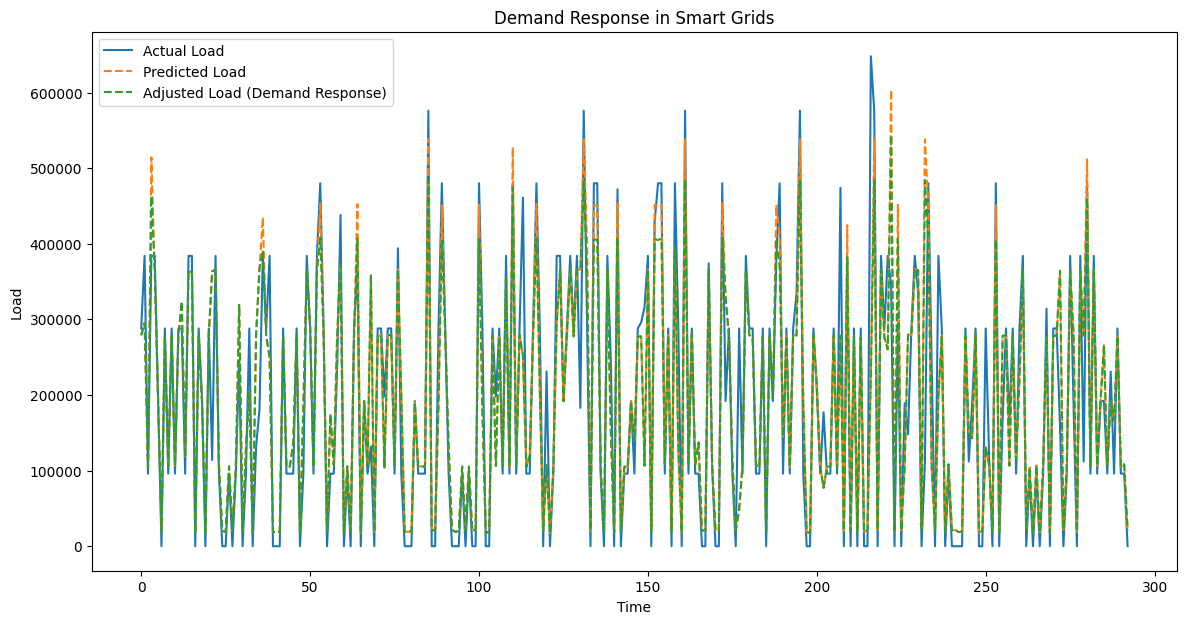

In [ ]:
# Define a threshold for peak load
threshold = np.percentile(y_pred, 90)

# Demand response: Reduce load by 10% during peak times
demand_response = np.where(y_pred > threshold, y_pred * 0.9, y_pred)

# Plot the original and adjusted predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual Load')
plt.plot(y_pred, label='Predicted Load', linestyle='--')
plt.plot(demand_response, label='Adjusted Load (Demand Response)', linestyle='--')
plt.legend()
plt.title('Demand Response in Smart Grids')
plt.xlabel('Time')
plt.ylabel('Load')
plt.show()

In [ ]:
# Calculate the difference in load due to demand response
load_reduction = np.sum(y_pred - demand_response)
print(f"Total Load Reduction due to Demand Response: {load_reduction:.2f} kWh")

Total Load Reduction due to Demand Response: 1428139.57 kWh
